In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
online_rt = pd.read_csv("/content/Online_Retail.csv", encoding = 'latin1')
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
234227,557502,22382,LUNCH BAG SPACEBOY DESIGN,1.0,6/20/11 15:32,4.13,NaN,United Kingdom
234228,557502,22383,LUNCH BAG SUKI DESIGN,1.0,6/20/11 15:32,4.13,NaN,United Kingdom
234229,557502,22384,LUNCH BAG PINK POLKADOT,1.0,6/20/11 15:32,4.13,NaN,United Kingdom
234230,557502,22385,JUMBO BAG SPACEBOY DESIGN,3.0,6/20/11 15:32,4.13,NaN,United Kingdom


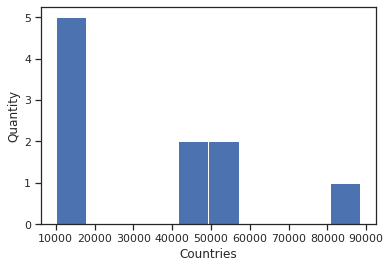

In [4]:
cm = online_rt.groupby('Country').sum()
cm = cm.sort_values(by = 'Quantity',ascending = False)[1:11]
cm['Quantity'].plot(kind='hist')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.show()

In [5]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
234226,557502,22380,TOY TIDY SPACEBOY,1.0,6/20/11 15:32,4.13,NaN,United Kingdom
234227,557502,22382,LUNCH BAG SPACEBOY DESIGN,1.0,6/20/11 15:32,4.13,NaN,United Kingdom
234228,557502,22383,LUNCH BAG SUKI DESIGN,1.0,6/20/11 15:32,4.13,NaN,United Kingdom
234229,557502,22384,LUNCH BAG PINK POLKADOT,1.0,6/20/11 15:32,4.13,NaN,United Kingdom


In [6]:
q=online_rt.groupby('Country').Quantity.sum()
q=q.sort_values(ascending=True)
q=pd.DataFrame(data=q)
q=q.drop('United Kingdom')
c=q.tail(3)
c=pd.DataFrame(data=c)
c.reset_index(level=0, inplace=True)
tp=c['Country'].to_list()
tp

['EIRE', 'Germany', 'Netherlands']

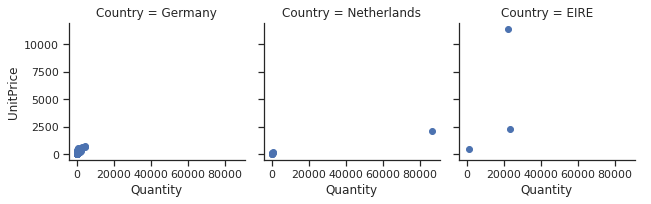

In [7]:
ct = online_rt.groupby(['CustomerID','Country']).sum()
ct = ct[ct.UnitPrice > 0]
ct['Country'] = ct.index.get_level_values(1)
ct = ct[ct['Country'].isin(tp)]
g = sns.FacetGrid(ct, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

In [8]:
ct

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12426.0,Germany,258.0,118.09,Germany
12427.0,Germany,79.0,49.25,Germany
12468.0,Germany,366.0,133.57,Germany
12471.0,Germany,3049.0,683.92,Germany
12472.0,Germany,2616.0,517.99,Germany
...,...,...,...,...
13817.0,Germany,63.0,33.20,Germany
14016.0,EIRE,1428.0,488.54,EIRE
14156.0,EIRE,23642.0,2253.44,EIRE


In [9]:

online_rt.loc[(online_rt['CustomerID']==12346.0)|(online_rt['CustomerID']==12347.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12.0,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4.0,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12.0,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36.0,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12.0,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
220585,556201,22196,SMALL HEART MEASURING SPOONS,24.0,6/9/11 13:01,0.85,12347.0,Iceland
220586,556201,84558A,3D DOG PICTURE PLAYING CARDS,18.0,6/9/11 13:01,2.95,12347.0,Iceland
220587,556201,51014C,"FEATHER PEN,COAL BLACK",12.0,6/9/11 13:01,0.85,12347.0,Iceland
220588,556201,22727,ALARM CLOCK BAKELIKE RED,8.0,6/9/11 13:01,3.75,12347.0,Iceland


In [10]:
sv= online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)
tp3 = sv.index[1:4] 
tp3

Index(['Netherlands', 'Germany', 'EIRE'], dtype='object', name='Country')

In [11]:
online_rt['Revenue']=online_rt['Quantity']*online_rt['UnitPrice']
online_rt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
234226,557502,22380,TOY TIDY SPACEBOY,1.0,6/20/11 15:32,4.13,NaN,United Kingdom,4.13
234227,557502,22382,LUNCH BAG SPACEBOY DESIGN,1.0,6/20/11 15:32,4.13,NaN,United Kingdom,4.13
234228,557502,22383,LUNCH BAG SUKI DESIGN,1.0,6/20/11 15:32,4.13,NaN,United Kingdom,4.13
234229,557502,22384,LUNCH BAG PINK POLKADOT,1.0,6/20/11 15:32,4.13,NaN,United Kingdom,4.13


In [12]:
g = online_rt[online_rt.Country.isin(tp3)].groupby(['CustomerID','Country'])
g.head()
p = g['Quantity','Revenue'].agg('sum')
p['AvgPrice'] = p.Revenue / p.Quantity
p['Country'] = p.index.get_level_values(1) # get the value of the index and put in the column Country
p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258.0,582.73,2.258643,Germany
12427.0,Germany,79.0,303.50,3.841772,Germany
12468.0,Germany,366.0,729.54,1.993279,Germany
12471.0,Germany,3049.0,8397.32,2.754123,Germany
12472.0,Germany,2616.0,4315.50,1.649656,Germany
...,...,...,...,...,...
13817.0,Germany,63.0,128.70,2.042857,Germany
14016.0,EIRE,1428.0,3364.63,2.356183,EIRE
14156.0,EIRE,23642.0,49348.93,2.087342,EIRE


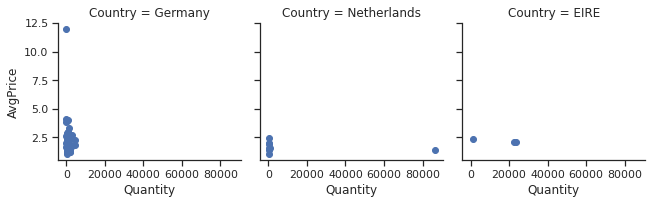

In [13]:
graph = sns.FacetGrid(p, col="Country")
graph.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
graph.add_legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


[]

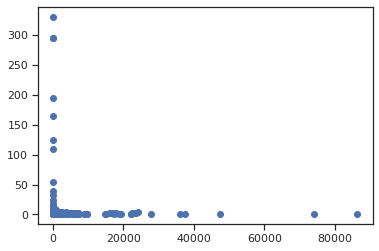

In [22]:
gd = online_rt.groupby(['CustomerID'])
pl = gd['Quantity','Revenue'].agg('sum')
pl['AvgPrice'] = pl.Revenue / pl.Quantity

plt.scatter(pl.Quantity, pl.AvgPrice)
plt.plot()

[]

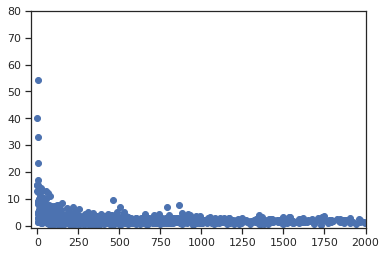

In [20]:
gpd = online_rt.groupby(['CustomerID','Country'])
pt = gpd.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
pt['AvgPrice'] = pt.Revenue / pt.Quantity
plt.scatter(pt.Quantity, pt.AvgPrice)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()

